In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [6]:
pt1 = pd.read_csv("articles1.csv") 


In [7]:
pt1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [8]:
len(pt1)

50000

In [10]:
pt2 = pd.read_csv('data/articles2.csv')

In [11]:
pt3 = pd.read_csv('data/articles3.csv')
len(pt3)

42571

In [12]:
articles = pd.concat([pt1,pt2,pt3])
len(articles)

142570

In [13]:
articles.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News',
       'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters',
       'Vox', 'Washington Post'], dtype=object)

In [15]:
print(articles['year'].min())
articles['year'].max()

2000.0


2017.0

In [16]:
articles['year'].value_counts()

2016.0    85405
2017.0    50404
2015.0     3705
2013.0      228
2014.0      125
2012.0       34
2011.0        8
2010.0        6
2008.0        3
2009.0        3
2004.0        2
2003.0        2
2005.0        2
2007.0        1
2000.0        1
Name: year, dtype: int64

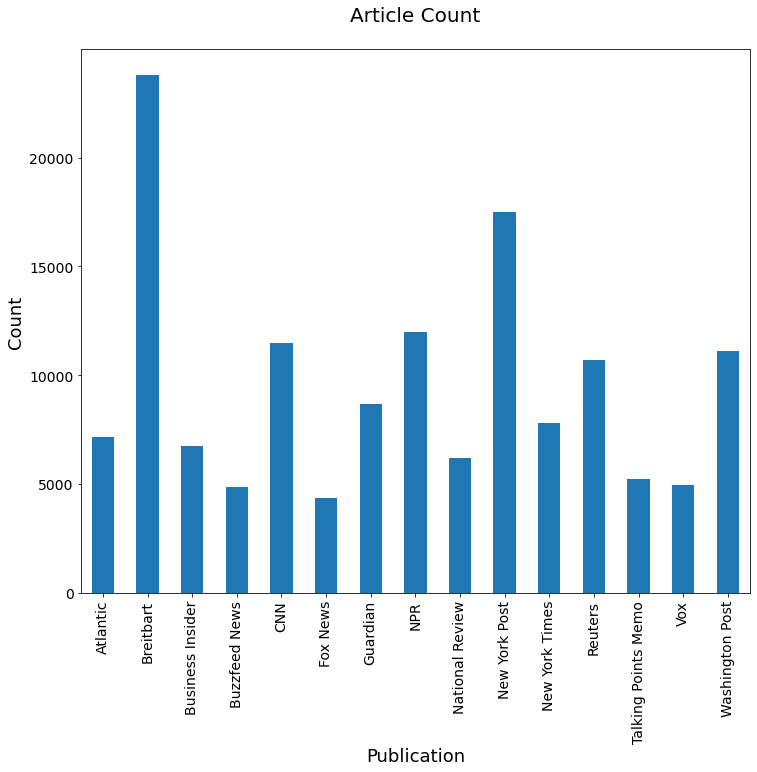

In [17]:
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

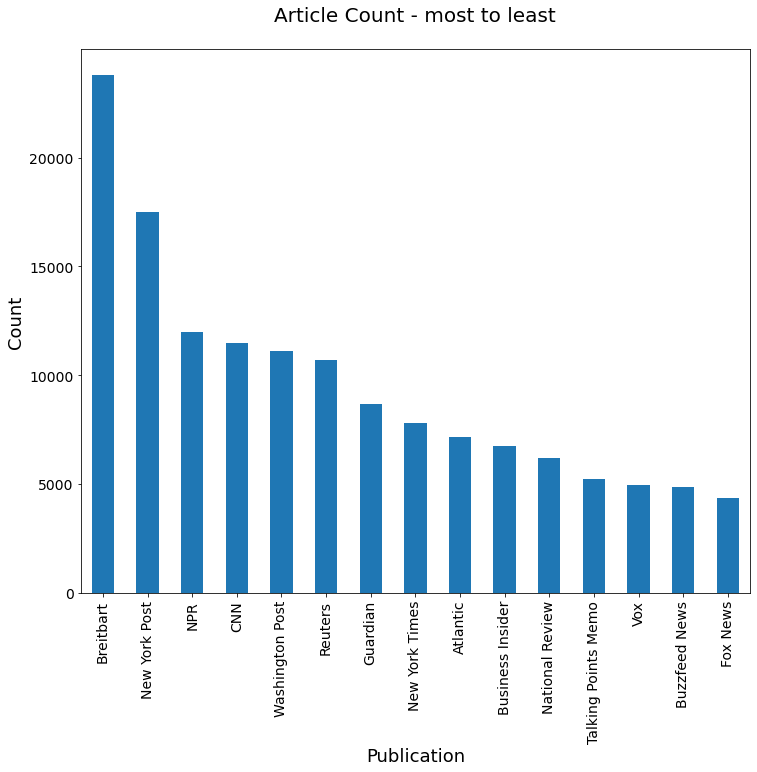

In [18]:
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [19]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [20]:
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))

In [21]:
articles['tokenized'].head()

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object

In [22]:
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
articles['num_wds'].mean()

732.3601248509505

In [23]:
len(articles[articles['num_wds']==0])

97

In [24]:
articles = articles[articles['num_wds']>0]
articles['num_wds'].mean()
articles['num_wds'].min()

1

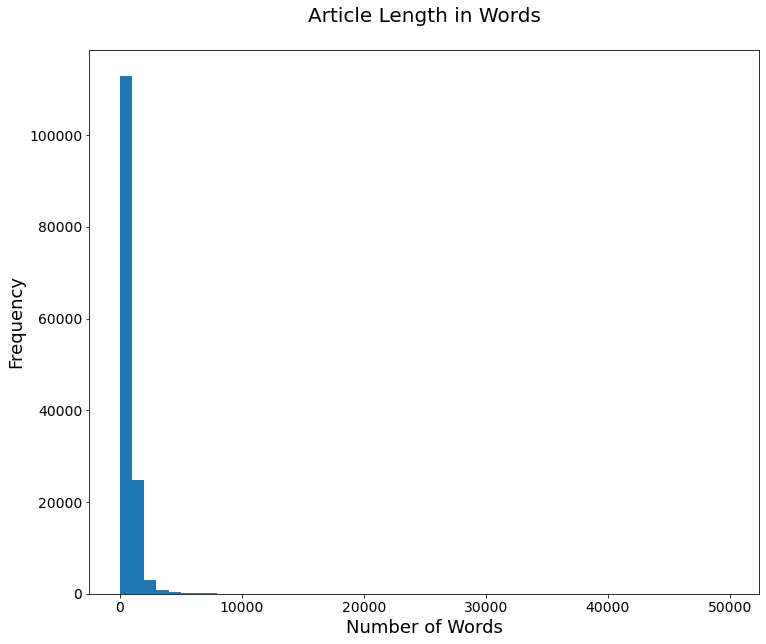

In [25]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [26]:
set('b ac b'.split())

{'ac', 'b'}

In [1]:
articles['uniq_wds'] = articles['tokenized'].str.split().apply(lambda x: len(set(x)))
#articles['uniq_wds'].head()

NameError: name 'articles' is not defined

In [ ]:
articles['uniq_wds'].mean()
articles['uniq_wds'].min()
articles['uniq_wds'].max()

In [ ]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [ ]:
art_grps = articles.groupby('publication')

ax=art_grps['title'].aggregate(len).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Articles per Publication (repeated)\n', fontsize=20)
ax.set_ylabel('Number of Articles', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [ ]:
ax=art_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [ ]:
ax=art_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Unique Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [ ]:
wd_counts = Counter()
for i, row in articles.iterrows():
    wd_counts.update(row['tokenized'].split())

In [ ]:
stopwords.words('english')

In [ ]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [ ]:
wd_counts.most_common(20)

In [ ]:
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

In [ ]:
disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate)|(climate\W+(?:\w+\W+){1,5}?chang)')

In [ ]:
disj.match('climate is changing')

In [ ]:
disj.match('change in extreme  climate')

In [ ]:
disj.match('nothing changing here except the weather')

In [ ]:
articles['cc_wds'] = articles['tokenized'].apply(find_cc_wds)
articles['cc_wds'].head()

In [ ]:
articles['cc_wds'].sum() / len(articles)

In [ ]:
art_grps['cc_wds'].sum()

In [ ]:
art_grps.count()

In [ ]:
proportions = art_grps['cc_wds'].sum() / art_grps['cc_wds'].count()
proportions.sort_values(ascending=True)
proportions

In [ ]:
ax=proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [ ]:
ax=proportions.sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication (Sorted)\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [ ]:
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'left', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'right', 'New York Times': 'left',
                'NPR': 'left', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
articles['bias'] = articles['publication'].apply(lambda x: bias_assigns[x])
articles.head()

In [ ]:
bias_groups = articles.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

In [ ]:
bias_groups['cc_wds'].count()

In [ ]:
ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18);